In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd

In [117]:
data=pd.read_csv('Trial_Joint_Angles.csv')
X = data.T.iloc[2:]
X

,0,1,2,3,4,5,6,7,8,9,...,15789,15790,15791,15792,15793,15794,15795,15796,15797,15798
Neck right / left lateral bending (+/-),-0.26,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.26,-0.26,-0.26,...,3.78,3.78,3.79,3.81,3.85,3.89,3.93,3.98,4.02,4.07
Neck right / left rotation (+/-),0.19,0.18,0.17,0.16,0.15,0.14,0.13,0.12,0.11,0.11,...,-18.77,-18.73,-18.69,-18.63,-18.58,-18.53,-18.47,-18.42,-18.36,-18.32
Neck flexion / extension (+/-),0.10,0.10,0.10,0.11,0.11,0.12,0.13,0.14,0.15,0.16,...,-28.46,-28.48,-28.51,-28.57,-28.66,-28.76,-28.88,-29.02,-29.15,-29.25
Back right / left lateral bending (+/-),0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.04,0.04,0.04,...,3.46,3.37,3.26,3.14,3.01,2.87,2.73,2.62,2.54,2.47
Back right / left rotation (+/-),-0.18,-0.18,-0.17,-0.17,-0.16,-0.16,-0.16,-0.16,-0.15,-0.15,...,21.88,21.94,21.99,22.03,22.07,22.09,22.12,22.17,22.26,22.38
Back flexion / extension (+/-),-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.08,-0.07,-0.07,...,2.34,2.37,2.38,2.38,2.36,2.35,2.32,2.26,2.20,2.28
Shoulder (L) abduction / adduction (+/-),7.90,7.90,7.90,7.90,7.90,7.89,7.88,7.86,7.85,7.83,...,5.37,5.21,5.07,4.95,4.85,4.78,4.74,4.73,4.76,4.82
Shoulder (L) internal / external rotation (+/-),0.04,0.03,0.01,0.01,0.01,0.01,0.02,0.03,0.05,0.07,...,2.09,2.16,2.20,2.23,2.24,2.24,2.23,2.20,2.13,2.01
Shoulder (L) flexion / extension (+/-),-5.86,-5.85,-5.85,-5.84,-5.84,-5.84,-5.84,-5.83,-5.83,-5.83,...,-3.31,-3.27,-3.24,-3.21,-3.19,-3.17,-3.17,-3.18,-3.19,-3.19
Shoulder (R) abduction / adduction (+/-),-1.41,-1.41,-1.40,-1.39,-1.39,-1.38,-1.38,-1.37,-1.37,-1.36,...,8.79,8.72,8.64,8.57,8.53,8.51,8.49,8.47,8.45,8.43


In [ ]:
# constant value
X = np.full((5, 100), 20)


In [ ]:
# random value

X = np.random.rand(10, 100)  # Replace with your actual data

In [ ]:
# Sin value

# Generate an array of time points
time_points = np.linspace(0, 2*np.pi, 100)

# Create the matrix X with sinusoidal values
X = np.sin(time_points)

# Repeat the sine wave for each row
X = np.tile(X, (5, 1))

In [ ]:
# Create the X matrix with sinusoidal and linear values
num_rows = 2
num_columns = 100

# Generate an array of time points
time_points = np.linspace(0, 2*np.pi, num_columns)

# Create the first row with sinusoidal values
sin_values = np.sin(time_points)

# Create the second row with linearly increasing values
linear_values = np.linspace(0, 1, num_columns)

# Combine the rows to create the matrix X
X = np.vstack((sin_values, linear_values))

# print(X)


In [ ]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


window_size = 5
smoothed_data = pd.DataFrame(moving_average(X.iloc[4], window_size))

In [ ]:
start = 1000
end = 14000
plt.plot(X.iloc[4,start:end], label = 'raw')
#plt.plot(smoothed_data.loc[start:end], label = 'smooth')
plt.legend()

In [37]:
import numpy as np
import pandas as pd
from scipy.linalg import svd

# Construct data matrices for DMD
X1 = X.iloc[:, :-1]
X2 = X.iloc[:, 1:]

# Perform Singular Value Decomposition (SVD)
U, s, Vh = svd(X1, full_matrices=False)
s_ = np.diag(s)
Vh_ = Vh.conj().T
# Approximate the A matrix using DMD formula
Atilde = np.dot(np.dot(U.T, X2), Vh_)@ np.linalg.inv(s_) 


# Compute eigenvalues and eigenvectors of Atilde
eigenvalues, eigenvectors = np.linalg.eig(Atilde)

# Compute DMD modes
DMD_modes = np.dot(np.dot(X2, Vh_), np.linalg.inv(s_)) @ eigenvectors
pd.DataFrame(DMD_modes)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.004465-0.009000j,0.004465+0.009000j,0.001882+0.005441j,0.001882-0.005441j,-0.022354-0.009363j,-0.022354+0.009363j,0.004369-0.002491j,0.004369+0.002491j,-0.003961-0.003736j,-0.003961+0.003736j,...,0.005536+0.029181j,0.005536-0.029181j,-0.013348+0.011485j,-0.013348-0.011485j,0.017474+0.000000j,0.020301+0.008960j,0.020301-0.008960j,-0.034634+0.000000j,-0.000368-0.000759j,-0.000368+0.000759j
1,0.000101-0.001479j,0.000101+0.001479j,-0.009620+0.005896j,-0.009620-0.005896j,-0.015638+0.038918j,-0.015638-0.038918j,0.001475+0.001994j,0.001475-0.001994j,-0.030614+0.004559j,-0.030614-0.004559j,...,-0.046252+0.073788j,-0.046252-0.073788j,0.036046+0.005306j,0.036046-0.005306j,-0.148502+0.000000j,0.185181-0.063239j,0.185181+0.063239j,0.430719+0.000000j,0.001146-0.052972j,0.001146+0.052972j
2,-0.004219-0.011362j,-0.004219+0.011362j,0.006761+0.017901j,0.006761-0.017901j,-0.002240-0.018779j,-0.002240+0.018779j,0.021227-0.010658j,0.021227+0.010658j,0.001055-0.007112j,0.001055+0.007112j,...,-0.070660-0.052108j,-0.070660+0.052108j,-0.005865-0.076646j,-0.005865+0.076646j,-0.241398+0.000000j,-0.030945+0.012426j,-0.030945-0.012426j,0.058037+0.000000j,-0.048635+0.055961j,-0.048635-0.055961j
3,-0.006164-0.015262j,-0.006164+0.015262j,0.002267+0.005378j,0.002267-0.005378j,-0.026802+0.010294j,-0.026802-0.010294j,0.012544-0.018958j,0.012544+0.018958j,0.003769-0.013561j,0.003769+0.013561j,...,-0.001000-0.002432j,-0.001000+0.002432j,0.012266-0.001886j,0.012266+0.001886j,0.022500+0.000000j,-0.022289-0.019259j,-0.022289+0.019259j,0.000839+0.000000j,0.009024-0.019541j,0.009024+0.019541j
4,0.024633-0.002791j,0.024633+0.002791j,-0.019645-0.012711j,-0.019645+0.012711j,-0.035463-0.067345j,-0.035463+0.067345j,0.003941-0.008095j,0.003941+0.008095j,0.014181-0.044415j,0.014181+0.044415j,...,-0.015836-0.012424j,-0.015836+0.012424j,-0.034427-0.077962j,-0.034427+0.077962j,0.088117+0.000000j,-0.128654+0.005483j,-0.128654-0.005483j,-0.376877+0.000000j,-0.008297+0.046217j,-0.008297-0.046217j
5,-0.004487+0.012792j,-0.004487-0.012792j,0.013562-0.016574j,0.013562+0.016574j,-0.008865+0.002730j,-0.008865-0.002730j,-0.014089+0.006669j,-0.014089-0.006669j,-0.003896+0.003183j,-0.003896-0.003183j,...,0.009920+0.009496j,0.009920-0.009496j,-0.008573-0.001259j,-0.008573+0.001259j,-0.001235+0.000000j,0.011560+0.017083j,0.011560-0.017083j,-0.038127+0.000000j,-0.010597+0.004479j,-0.010597-0.004479j
6,-0.018235+0.004038j,-0.018235-0.004038j,0.017061-0.009065j,0.017061+0.009065j,-0.001233-0.012308j,-0.001233+0.012308j,0.023515-0.006347j,0.023515+0.006347j,-0.001741+0.009157j,-0.001741-0.009157j,...,-0.017714-0.002048j,-0.017714+0.002048j,-0.008757+0.010169j,-0.008757-0.010169j,0.065570+0.000000j,0.033646-0.018679j,0.033646+0.018679j,0.047894+0.000000j,0.023511+0.015468j,0.023511-0.015468j
7,-0.018100-0.009345j,-0.018100+0.009345j,-0.000247+0.012590j,-0.000247-0.012590j,-0.025970-0.033845j,-0.025970+0.033845j,-0.009062-0.063335j,-0.009062+0.063335j,0.020762-0.016679j,0.020762+0.016679j,...,0.020883+0.029120j,0.020883-0.029120j,-0.005049-0.000648j,-0.005049+0.000648j,0.059614+0.000000j,0.070008+0.087005j,0.070008-0.087005j,0.401378+0.000000j,-0.039924-0.032574j,-0.039924+0.032574j
8,0.008603-0.010967j,0.008603+0.010967j,-0.002989+0.013369j,-0.002989-0.013369j,-0.014003-0.026692j,-0.014003+0.026692j,-0.020255+0.039107j,-0.020255-0.039107j,0.013675-0.021273j,0.013675+0.021273j,...,0.013809+0.009958j,0.013809-0.009958j,-0.016432-0.006989j,-0.016432+0.006989j,-0.049551+0.000000j,-0.014638+0.027956j,-0.014638-0.027956j,-0.038998+0.000000j,-0.016048+0.011317j,-0.016048-0.011317j
9,-0.026811-0.007425j,-0.026811+0.007425j,0.002412+0.022813j,0.002412-0.022813j,-0.048678-0.033110j,-0.048678+0.033110j,0.005370-0.014857j,0.005370+0.014857j,-0.005954-0.042628j,-0.005954+0.042628j,...,-0.007178+0.005669j,-0.007178-0.005669j,0.017501+0.016154j,0.017501-0.016154j,0.047609+0.000000j,-0.017362-0.020001j,-0.017362+0.020001j,-0.066678+0.000000j,0.016828-0

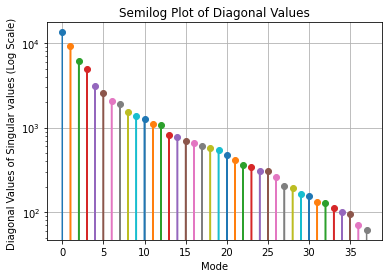

In [87]:
plt.semilogy(np.diag(s), marker='o', linestyle='-', markersize=6)
plt.xlabel('Mode')
plt.ylabel('Diagonal Values of Singular values (Log Scale) ')
plt.title('Semilog Plot of Diagonal Values')
plt.grid()
plt.show()

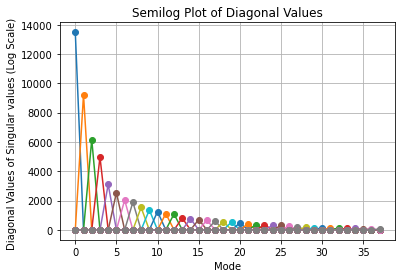

In [88]:
plt.plot(np.diag(s), marker='o', markersize=6)
plt.xlabel('Mode')
plt.ylabel('Diagonal Values of Singular values (Log Scale) ')
plt.title('Semilog Plot of Diagonal Values')
plt.grid()
plt.show()

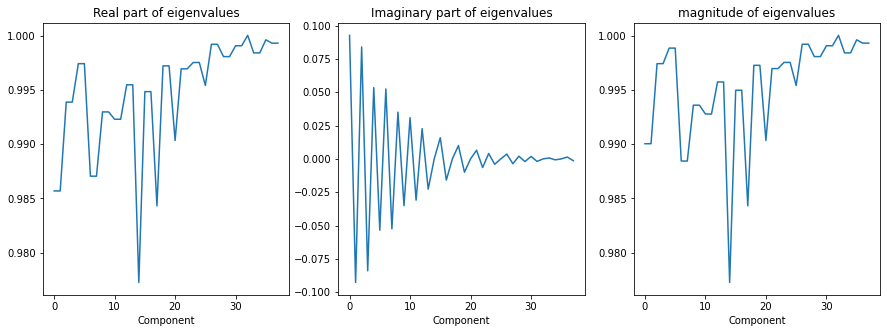

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot real parts of Eigenvalues
axes[0].plot(np.real(eigenvalues))
axes[0].set_xlabel('Component')
#axes[0].set_ylabel('Values')
axes[0].set_title('Real part of eigenvalues')

# Plot imaginary parts of Eigenvalues
axes[1].plot(np.imag(eigenvalues))
axes[1].set_xlabel('Component')
#axes[1].set_ylabel('Values')
axes[1].set_title('Imaginary part of eigenvalues')

# Plot magnitude of Eigenvalues

axes[2].plot(np.abs(eigenvalues))
axes[2].set_xlabel('Component')
#axes[2].set_ylabel('Values')
axes[2].set_title('magnitude of eigenvalues')

plt.show()

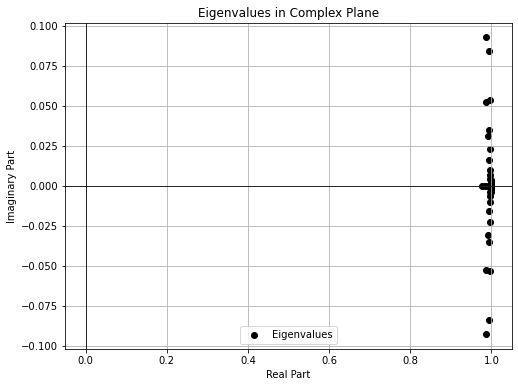

In [90]:

# Step 1: Sort eigenvalues by magnitude in descending order
sorted_indices = np.argsort(np.abs(eigenvalues))[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Step 2: Plot eigenvalues in the complex plane
plt.figure(figsize=(8, 6))
plt.scatter(np.real(sorted_eigenvalues), np.imag(sorted_eigenvalues), c='black', marker='o', label='Eigenvalues')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Eigenvalues in Complex Plane')
plt.grid()
plt.legend()

# Step 3: Observe the plot to identify dominant modes
# You might see clusters or patterns that indicate dominant modes

plt.show()


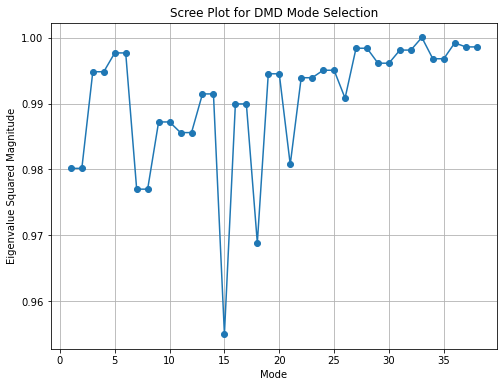

In [91]:
# Calculate the squared magnitudes of the eigenvalues
squared_magnitudes = np.abs(eigenvalues) ** 2

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(squared_magnitudes) + 1), squared_magnitudes, marker='o')
plt.xlabel('Mode')
plt.ylabel('Eigenvalue Squared Magnitude')
plt.title('Scree Plot for DMD Mode Selection')
plt.grid()

# Identify the "elbow point" (where the eigenvalues level off)
# You might need to manually inspect the plot to determine the point

plt.show()

In [115]:
# Construct data matrices for DMD
X1 = X.iloc[:, :-1]
X2 = X.iloc[:, 1:]

# Perform Singular Value Decomposition (SVD)
U, s, Vh = svd(X1, full_matrices=False)

# Truncate the SVD matrices to reduce dimensions
rank = 9  # Choose the rank based on desired dimensions
Ur = U[:, :rank]
Sr = np.diag(s)[:rank, :rank]
Vhr = Vh.conj().T[:, :rank]

# Approximate the A matrix using DMD formula
Atilde_r = np.dot(np.dot(Ur.T, X2), Vhr) @ np.linalg.inv(Sr)

# Compute eigenvalues and eigenvectors of Atilde
W_r, D_r = np.linalg.eig(Atilde_r)

# Compute DMD modes
Phi_r = np.dot(np.dot(X2, Vhr), np.linalg.inv(Sr)) @ D_r

# Calculate lambda and omega
lambda_r = np.diag(D_r)
omega = np.log(lambda_r).reshape(-1,1) 

# Compute DMD mode amplitudes
x1 = X.iloc[:, 0].to_numpy().reshape(-1, 1)  # Convert to 2D array
b = np.linalg.lstsq(Phi_r, x1, rcond=None)[0]

# DMD reconstructions

m = X1.shape[1]
time_dynamics = np.zeros((rank, m))
t = np.arange(m)
for i in range(m):
      time_dynamics[:, i] = (b* np.exp(omega * t[i])).flatten()
#X_dmd[:, t] = np.dot(np.diag(np.power(eigenvalues, t)), b)
Xdmd = np.dot(Phi_r, time_dynamics)


C:\Users\hodan\AppData\Local\Temp\ipykernel_9632\3547723839.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  time_dynamics[:, i] = (b* np.exp(omega * t[i])).flatten()


In [114]:
time_dynamics[:,3]

array([ 1.02785178e-02,  3.43454185e-04, -4.65426899e-04, -4.39542313e-03,
        1.10497619e-04,  5.22401973e-01,  4.16757040e-04, -4.70610289e-04,
       -1.66005654e-03,  5.73033155e-04, -4.89993405e-05, -1.56342712e-03,
        2.72212909e-03, -1.77103517e-05, -3.12021087e-06,  7.57535286e-05,
        9.21131550e-04, -7.74300627e-06,  1.76763343e-03,  3.89458393e-06,
       -4.14795538e-05,  1.35349180e-04, -3.20156741e-04, -6.74975299e-06,
        1.47588731e-05,  4.26041119e-04,  1.45525256e-04, -3.39824880e-08,
        1.61160599e-04,  3.94039977e-07,  1.64605455e-06, -6.99216801e-09,
       -6.64753260e-06,  7.02326928e-05,  6.73173747e-06, -4.75426287e-06,
       -7.97935947e-06])

C:\Users\hodan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


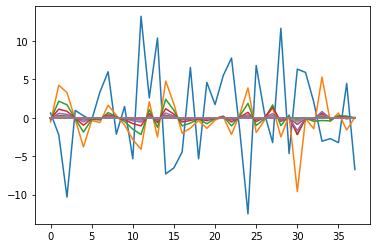

In [116]:
plt.plot(Xdmd)
plt.show()

C:\Users\hodan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


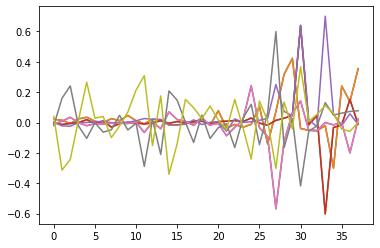

In [104]:
plt.plot(Phi_r)
plt.show()

In [ ]:
# DMD_modes is a matrix where each column represents a mode

# Plot magnitude of DMD modes
plt.figure(figsize=(10, 6))
for i in range(DMD_modes_r.shape[1]):
    plt.plot(np.abs(DMD_modes_r[:, i]), label=f'Mode {i + 1}')
plt.xlabel('Component')
plt.ylabel('Magnitude')
plt.title('Magnitude of DMD Modes')
plt.legend()
plt.grid()
plt.show()


In [92]:
# Step 1: Select the desired number of dominant modes
num_modes = 9  # Replace with your desired number of modes
selected_modes = Vh[:, :num_modes]

# Step 2: Reconstruct the modes
reconstructed_modes = np.dot(np.dot(X2, selected_modes), np.linalg.inv(s))

# Step 3: Reconstruct the dynamic evolution of modes over time
timesteps = 14000  # Number of time steps
X_dmd = np.zeros((num_modes, timesteps), dtype=complex)
b = np.linalg.lstsq(reconstructed_modes, X1[:, 0], rcond=None)[0]
for t in range(timesteps):
    X_dmd[:, t] = np.dot(np.diag(np.power(eigenvalues, t)), b)

# Print reconstructed modes and dynamic evolution
print("Reconstructed Modes:\n", reconstructed_modes)
print("\nReconstructed Dynamic Evolution:\n", X_dmd)

ValueError: shapes (38,15798) and (38,9) not aligned: 15798 (dim 1) != 38 (dim 0)

In [ ]:

# Choose the number of modes to retain
num_modes_retained = 9  # Replace with your chosen number of modes

# Select the retained modes and eigenvalues
selected_modes = DMD_modes[:, :num_modes_retained]
selected_eigenvalues = eigenvalues[:num_modes_retained]

num_features, num_time_steps = X.shape
# Generate time steps based on the number of columns
start_time = 0
end_time = num_time_steps # Adjust as needed
time_steps = np.linspace(start_time, end_time, num_time_steps)


# Create the reconstructed data
reconstructed_data = np.zeros((num_features, num_time_steps), dtype=complex)

for i in range(num_modes_retained):
    mode_contribution = np.outer(selected_modes[:, i], np.exp(selected_eigenvalues[i] * time_steps))
    reconstructed_data += mode_contribution

# Print the reconstructed data
plt.plot(reconstructed_data)


C:\Users\hodan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


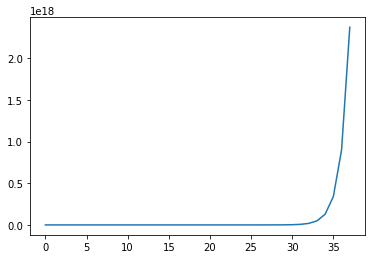

In [106]:
import numpy as np
from scipy.linalg import svd


# Make predictions using DMD modes
initial_state = X1.iloc[:, -1]
predicted_states = []
for i in range(len(X1)):
    predicted_state = np.dot(np.exp(eigenvalues * i), DMD_modes.T) @ initial_state
    predicted_states.append(predicted_state)

predicted_states = np.array(predicted_states)

# Print the predicted states
plt.plot(predicted_states)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have DMD_modes defined previously
# DMD_modes is a matrix where each column represents a mode

# Plot magnitude of DMD modes
plt.figure(figsize=(10, 6))
for i in range(DMD_modes.shape[1]):
    plt.plot(np.abs(DMD_modes[:, i]), label=f'Mode {i + 1}')
plt.xlabel('Component')
plt.ylabel('Magnitude')
plt.title('Magnitude of DMD Modes')
plt.legend()
plt.grid()
plt.show()

# Plot real and imaginary parts of DMD modes
plt.figure(figsize=(10, 6))
for i in range(DMD_modes.shape[1]):
    plt.plot(np.real(DMD_modes[:, i]), label=f'Real - Mode {i + 1}')
    plt.plot(np.imag(DMD_modes[:, i]), label=f'Imaginary - Mode {i + 1}')
plt.xlabel('Component')
plt.ylabel('Value')
plt.title('Real and Imaginary Parts of DMD Modes')
plt.legend()
plt.grid()
plt.show()
